# Modelo de Regresion Logistica Binaria

In [463]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis de datos train_data

In [464]:
# cargar datos preprocesados
df = pd.read_csv('../Datos_Hackaton/train_data_preparado_.csv', sep=';')
df

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,25/11/1999,140011,990,75,25/01/2018,Soltero,0
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,16/10/1996,182774,990,81,24/07/2021,Soltero,1
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,29/01/1971,682106,960,74,13/07/2016,Viudo,0
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,28/04/1992,270232,960,82,21/07/2014,Soltero,1
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,3/05/1992,266804,950,82,22/07/2014,Soltero,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,100824,1021470,1,Presencial,651,8,Mujer,Portal Web,15,2/02/1975,294641,120,79,16/03/2022,Soltero,1
1991,103863,1021470,1,Presencial,652,8,Mujer,Portal Web,15,15/03/1975,301334,120,79,18/03/2022,Soltero,1
1992,102945,1021540,1,Presencial,121,1,Hombre,Portal Web,6,3/07/1967,738060,120,77,2/05/2023,Divorciado,0
1993,103973,1021570,1,Presencial,4735,2,Mujer,Linkedin,12,22/09/1968,715749,110,81,23/06/2022,Soltero,1


## Evaluacion Performance Score

In [465]:
df_ps = df[df['performance_score']< 80]
df_ps

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses


Al parecer no hay empleados con puntaje de productividad menor a 80

In [466]:
# Tamano de las graficas
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

# Estilo de graficas
sns.set_theme(style="whitegrid")

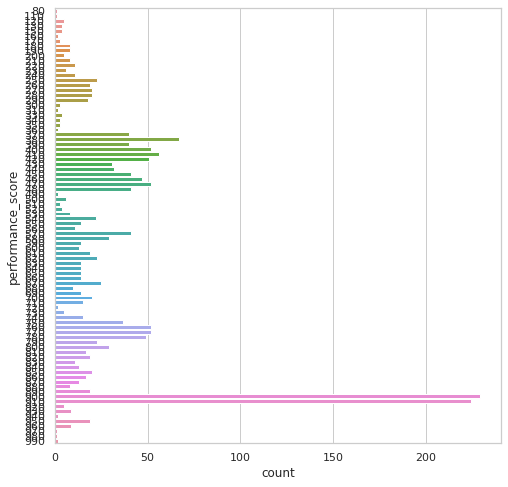

In [467]:
# visualicacion de performance score
sns.countplot(data=df, y='performance_score');

## Evalucacion de variable objetivo

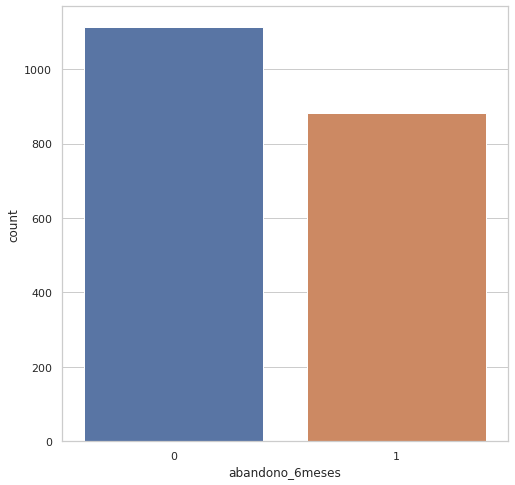

In [468]:
sns.countplot(x='abandono_6meses', data=df)
plt.show()

In [469]:
# conteo de variable objetivo
abandono_counts = df['abandono_6meses'].value_counts()
abandono_counts

0    1113
1     882
Name: abandono_6meses, dtype: int64

In [470]:
# libreria para aplicar undersampling
from imblearn.under_sampling import RandomUnderSampler

# Creamos un objeto undersample 
undersample = RandomUnderSampler(random_state=42)

In [471]:
# dividimos el dataset en dos grupos
# datos sin la variable clase
X = df.drop('abandono_6meses',axis=1)

# datos de la variable clase
y = df.abandono_6meses

In [472]:
# pasamos ambos grupos al metodo fit_resample para ajustar la data
X_over , y_over = undersample.fit_resample(X,y)

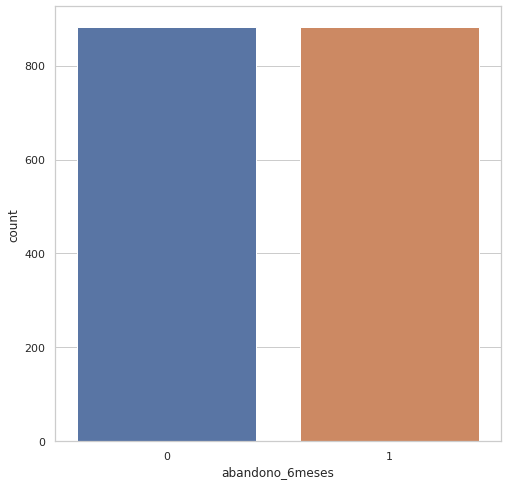

In [473]:
# Graficamos las clases contenidas en X_over
sns.countplot(x=y_over, data=X_over)
plt.show()

De esta manera hemos ajustado ambas clases para que tengan la misma cantidad de registros y el modelo aprenda de manera correcta

In [474]:
# Agrupamos los datos para analizar todo el conjunto
df_train = X_over.copy(deep=True)
df_train['abandono_6meses'] = y_over

df_train

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
1427,103102,1020660,1,Presencial,23,0,Mujer,Headhunter,9,6/09/1980,864917,540,65,8/08/2014,Soltero,0
155,101499,1021060,1,Híbrida,151,2,Mujer,Portal Web,6,10/10/1984,787447,870,62,6/02/2021,Soltero,0
1783,101698,1021370,1,Presencial,145,3,Mujer,Portal Web,3,14/04/1995,224733,380,68,10/05/2020,Casado,0
1176,100429,1021230,1,Presencial,158,1,Mujer,Ferias & Networking,18,13/11/1968,722463,760,75,14/01/2021,Casado,0
579,100622,1020910,1,Híbrida,348,4,Mujer,Portal Web,10,25/11/1985,389056,220,79,8/05/2017,Soltero,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,102747,1020890,1,Presencial,185,2,Mujer,Referidos,8,18/05/1990,285963,130,81,15/08/2016,Casado,1
1990,100824,1021470,1,Presencial,651,8,Mujer,Portal Web,15,2/02/1975,294641,120,79,16/03/2022,Soltero,1
1991,103863,1021470,1,Presencial,652,8,Mujer,Portal Web,15,15/03/1975,301334,120,79,18/03/2022,Soltero,1
1993,103973,1021570,1,Presencial,4735,2,Mujer,Linkedin,12,22/09/1968,715749,110,81,23/06/2022,Soltero,1


## Heatmap de correlacion

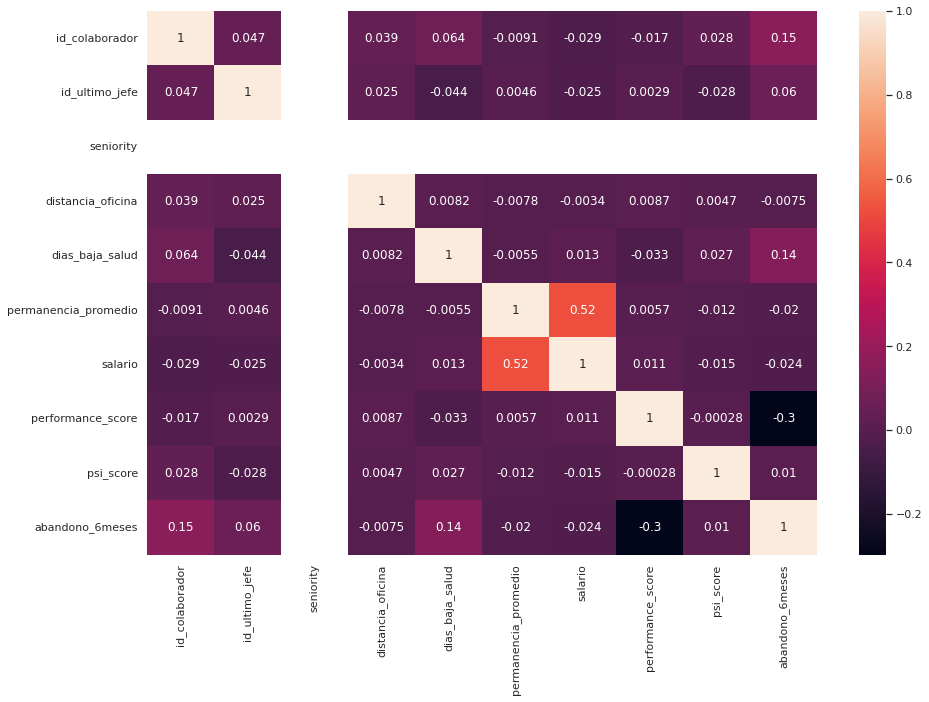

In [475]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [476]:
# eliminamos la variable seniority e id_colaborador ya que no contribuye al modelo
df_train.drop(['seniority', 'id_colaborador'], axis=1, inplace=True) 

# verificamos que ya no esten en el dataset
df_train.head()

,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
1427,1020660,Presencial,23,0,Mujer,Headhunter,9,6/09/1980,864917,540,65,8/08/2014,Soltero,0
155,1021060,Híbrida,151,2,Mujer,Portal Web,6,10/10/1984,787447,870,62,6/02/2021,Soltero,0
1783,1021370,Presencial,145,3,Mujer,Portal Web,3,14/04/1995,224733,380,68,10/05/2020,Casado,0
1176,1021230,Presencial,158,1,Mujer,Ferias & Networking,18,13/11/1968,722463,760,75,14/01/2021,Casado,0
579,1020910,Híbrida,348,4,Mujer,Portal Web,10,25/11/1985,389056,220,79,8/05/2017,Soltero,0


## Visualizacion de Relacione

In [477]:
#sns.pairplot(df_train, hue='abandono_6meses');

## Obtener Edad de ingreso de los empleados

In [478]:
df_prep = df_train.copy(deep=True)

In [479]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df_prep['fecha_incorporacion'] = pd.to_datetime(df_prep['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df_prep['fecha_nacimiento'] = pd.to_datetime(df_prep['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df_prep['year_nacimiento'] = df_prep['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df_prep['year_incorporacion'] = df_prep['fecha_incorporacion'].dt.year.astype(int)

# eliminar fecha_incorporacion
df_prep = df_prep.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df_prep = df_prep.drop('fecha_nacimiento', axis=1)

# obtener edad de los empleados
df_prep['edad_ingreso'] = df_prep['year_incorporacion'] - df_prep['year_nacimiento']

# eliminar year_nacimiento
df_prep = df_prep.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df_prep = df_prep.drop('year_incorporacion', axis=1)

# mostrar resultados
df_prep.head()

,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
1427,1020660,Presencial,23,0,Mujer,Headhunter,9,864917,540,65,Soltero,0,34
155,1021060,Híbrida,151,2,Mujer,Portal Web,6,787447,870,62,Soltero,0,37
1783,1021370,Presencial,145,3,Mujer,Portal Web,3,224733,380,68,Casado,0,25
1176,1021230,Presencial,158,1,Mujer,Ferias & Networking,18,722463,760,75,Casado,0,53
579,1020910,Híbrida,348,4,Mujer,Portal Web,10,389056,220,79,Soltero,0,32


## Convertir variables categoricas binarias a numericas

In [480]:
# librerias
from sklearn.preprocessing import LabelEncoder

# creamos una clase LabelEncoder
le = LabelEncoder()

### Genero

In [481]:
# pasamos la variable a convertir a la clase antes definida
df_prep['genero'] = le.fit_transform(df_prep['genero'])

# mostramos resultados
df_prep.head()

,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
1427,1020660,Presencial,23,0,1,Headhunter,9,864917,540,65,Soltero,0,34
155,1021060,Híbrida,151,2,1,Portal Web,6,787447,870,62,Soltero,0,37
1783,1021370,Presencial,145,3,1,Portal Web,3,224733,380,68,Casado,0,25
1176,1021230,Presencial,158,1,1,Ferias & Networking,18,722463,760,75,Casado,0,53
579,1020910,Híbrida,348,4,1,Portal Web,10,389056,220,79,Soltero,0,32


### Modalidad trabajo

In [482]:
df_prep['modalidad_trabajo'].unique()

array(['Presencial', 'Híbrida'], dtype=object)

In [483]:
# pasamos la variable a convertir a la clase antes definida
df_prep['modalidad_trabajo'] = le.fit_transform(df_prep['modalidad_trabajo'])

# mostramos resultados
df_prep.head()

,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
1427,1020660,1,23,0,1,Headhunter,9,864917,540,65,Soltero,0,34
155,1021060,0,151,2,1,Portal Web,6,787447,870,62,Soltero,0,37
1783,1021370,1,145,3,1,Portal Web,3,224733,380,68,Casado,0,25
1176,1021230,1,158,1,1,Ferias & Networking,18,722463,760,75,Casado,0,53
579,1020910,0,348,4,1,Portal Web,10,389056,220,79,Soltero,0,32


### Canal de Reclutamiento y Estado Civil

In [484]:
# Librerias
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing

In [485]:
transformer = sklearn.compose.make_column_transformer(

    # transformacion                         variables a transformar
    (sklearn.preprocessing.OneHotEncoder(), ['canal_reclutamiento', 'estado_civil']),
    
    # mantener sin cambio las variables no seleccionadas
    remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['canal_reclutamiento', 'estado_civil'])])

In [486]:
df_prep =(
    pd.DataFrame(
        transformer.fit_transform(df_prep),
        columns=transformer.get_feature_names_out(),
        index=df_prep.index
    )
    .rename(
        columns=lambda x: x.replace('remainder__', '').replace('onehotencoder__', '')
    )
    
)

df_prep

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
1427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1020660.0,1.0,23.0,0.0,1.0,9.0,864917.0,540.0,65.0,0.0,34.0
155,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021060.0,0.0,151.0,2.0,1.0,6.0,787447.0,870.0,62.0,0.0,37.0
1783,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1021370.0,1.0,145.0,3.0,1.0,3.0,224733.0,380.0,68.0,0.0,25.0
1176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1021230.0,1.0,158.0,1.0,1.0,18.0,722463.0,760.0,75.0,0.0,53.0
579,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1020910.0,0.0,348.0,4.0,1.0,10.0,389056.0,220.0,79.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1020890.0,1.0,185.0,2.0,1.0,8.0,285963.0,130.0,81.0,1.0,26.0
1990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021470.0,1.0,651.0,8.0,1.0,15.0,294641.0,120.0,79.0,1.0,47.0
1991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021470.0,1.0,652.0,8.0,1.0,15.0,301334.0,120.0,79.0,1.0,47.0
1993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1021570.0,1.0,4735.0,2.0,1.0,12.0,715749.0,110.0,81.0,1.0,54.0


# Analisis de datos de train

In [487]:
df_prep

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
1427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1020660.0,1.0,23.0,0.0,1.0,9.0,864917.0,540.0,65.0,0.0,34.0
155,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021060.0,0.0,151.0,2.0,1.0,6.0,787447.0,870.0,62.0,0.0,37.0
1783,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1021370.0,1.0,145.0,3.0,1.0,3.0,224733.0,380.0,68.0,0.0,25.0
1176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1021230.0,1.0,158.0,1.0,1.0,18.0,722463.0,760.0,75.0,0.0,53.0
579,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1020910.0,0.0,348.0,4.0,1.0,10.0,389056.0,220.0,79.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1020890.0,1.0,185.0,2.0,1.0,8.0,285963.0,130.0,81.0,1.0,26.0
1990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021470.0,1.0,651.0,8.0,1.0,15.0,294641.0,120.0,79.0,1.0,47.0
1991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021470.0,1.0,652.0,8.0,1.0,15.0,301334.0,120.0,79.0,1.0,47.0
1993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1021570.0,1.0,4735.0,2.0,1.0,12.0,715749.0,110.0,81.0,1.0,54.0


## Analisis de Correlacion

In [488]:
import matplotlib.pyplot as plt

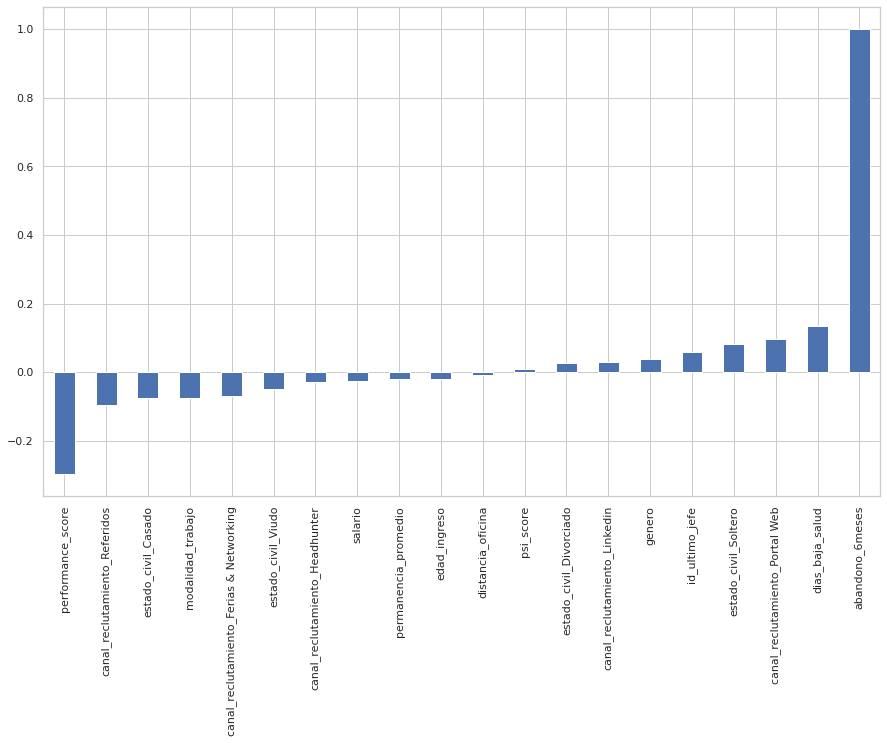

In [489]:
fig = plt.figure(figsize=(15,9))
df_prep.corr()['abandono_6meses'].sort_values(ascending=True).plot(kind='bar')
plt.show()

Variables con mayor correlacion
- performance score
- dias baja salud
- modalidad trabajo
- id ultimo jefe

## Seleccion de variables predictoras y objetivo

In [490]:
df_prep.head()

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
1427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1020660.0,1.0,23.0,0.0,1.0,9.0,864917.0,540.0,65.0,0.0,34.0
155,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021060.0,0.0,151.0,2.0,1.0,6.0,787447.0,870.0,62.0,0.0,37.0
1783,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1021370.0,1.0,145.0,3.0,1.0,3.0,224733.0,380.0,68.0,0.0,25.0
1176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1021230.0,1.0,158.0,1.0,1.0,18.0,722463.0,760.0,75.0,0.0,53.0
579,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1020910.0,0.0,348.0,4.0,1.0,10.0,389056.0,220.0,79.0,0.0,32.0


In [491]:
# variables predictoras
X = df_prep.drop('abandono_6meses',axis=1)

# variables objetivo
y = df_prep['abandono_6meses'].values

X

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
1427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1020660.0,1.0,23.0,0.0,1.0,9.0,864917.0,540.0,65.0,34.0
155,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021060.0,0.0,151.0,2.0,1.0,6.0,787447.0,870.0,62.0,37.0
1783,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1021370.0,1.0,145.0,3.0,1.0,3.0,224733.0,380.0,68.0,25.0
1176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1021230.0,1.0,158.0,1.0,1.0,18.0,722463.0,760.0,75.0,53.0
579,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1020910.0,0.0,348.0,4.0,1.0,10.0,389056.0,220.0,79.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1020890.0,1.0,185.0,2.0,1.0,8.0,285963.0,130.0,81.0,26.0
1990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021470.0,1.0,651.0,8.0,1.0,15.0,294641.0,120.0,79.0,47.0
1991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1021470.0,1.0,652.0,8.0,1.0,15.0,301334.0,120.0,79.0,47.0
1993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1021570.0,1.0,4735.0,2.0,1.0,12.0,715749.0,110.0,81.0,54.0


## Escalar los datos

In [492]:
# libreria para escalar datos
from sklearn.preprocessing import MinMaxScaler

In [493]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xs =  scaler.fit_transform(X)

In [494]:
# pasamos las variables predictoras a un dataframe
Xs = pd.DataFrame(Xs)

Xs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.380117,1.0,0.001000,0.000000,1.0,0.333333,0.932877,0.505495,0.175,0.50
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.614035,0.0,0.007094,0.057143,1.0,0.208333,0.841210,0.868132,0.100,0.56
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.795322,1.0,0.006809,0.085714,1.0,0.083333,0.175373,0.329670,0.250,0.32
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.713450,1.0,0.007428,0.028571,1.0,0.708333,0.764317,0.747253,0.425,0.88
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.526316,0.0,0.016474,0.114286,1.0,0.375000,0.369810,0.153846,0.525,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.514620,1.0,0.008713,0.057143,1.0,0.291667,0.247824,0.054945,0.575,0.34
1760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.853801,1.0,0.030900,0.228571,1.0,0.583333,0.258093,0.043956,0.525,0.76
1761,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.853801,1.0,0.030948,0.228571,1.0,0.583333,0.266012,0.043956,0.525,0.76
1762,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.912281,1.0,0.225349,0.057143,1.0,0.458333,0.756373,0.032967,0.575,0.90


In [495]:
# recuperamos los nombres de las variables predictoras
Xs.columns = X.columns
Xs

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.380117,1.0,0.001000,0.000000,1.0,0.333333,0.932877,0.505495,0.175,0.50
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.614035,0.0,0.007094,0.057143,1.0,0.208333,0.841210,0.868132,0.100,0.56
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.795322,1.0,0.006809,0.085714,1.0,0.083333,0.175373,0.329670,0.250,0.32
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.713450,1.0,0.007428,0.028571,1.0,0.708333,0.764317,0.747253,0.425,0.88
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.526316,0.0,0.016474,0.114286,1.0,0.375000,0.369810,0.153846,0.525,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.514620,1.0,0.008713,0.057143,1.0,0.291667,0.247824,0.054945,0.575,0.34
1760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.853801,1.0,0.030900,0.228571,1.0,0.583333,0.258093,0.043956,0.525,0.76
1761,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.853801,1.0,0.030948,0.228571,1.0,0.583333,0.266012,0.043956,0.525,0.76
1762,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.912281,1.0,0.225349,0.057143,1.0,0.458333,0.756373,0.032967,0.575,0.90


# Datos Preprocesados de test_data

In [496]:
df_testr = pd.read_csv('../Datos_Hackaton/test_data_preparado.csv', sep=',')
df_testr.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


In [497]:
# eliminamos la variable seniority e id_colaborador ya que no contribuye al modelo
df_test = df_testr.drop(['seniority', 'id_colaborador'], axis=1) 

# verificamos que ya no esten en el dataset
df_test.head()

,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,102115.0,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,102074.0,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,102150.0,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,102172.0,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,102060.0,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


## Obtener Edad de ingreso de los empleados

In [498]:
# copia del dataframe
df_X = df_test.copy(deep=True)
df_X.head()

,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,102115.0,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,102074.0,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,102150.0,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,102172.0,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,102060.0,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


In [499]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df_X['fecha_incorporacion'] = pd.to_datetime(df_X['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df_X['fecha_nacimiento'] = pd.to_datetime(df_X['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df_X['year_nacimiento'] = df_X['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df_X['year_incorporacion'] = df_X['fecha_incorporacion'].dt.year.astype(int)

# eliminar fecha_incorporacion
df_X = df_X.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df_X = df_X.drop('fecha_nacimiento', axis=1)

df_X['edad_ingreso'] = df_X['year_incorporacion'] - df_X['year_nacimiento']

# eliminar year_nacimiento
df_X = df_X.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df_X = df_X.drop('year_incorporacion', axis=1)

# mostrar resultados
df_X.head()

,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,edad_ingreso
0,102115.0,Híbrida,0.795,2,Hombre,Ferias & Networking,2,181654,99,81,Soltero,24
1,102074.0,Híbrida,1.715,1,Mujer,Ferias & Networking,1,140986,97,75,Soltero,19
2,102150.0,Híbrida,2.375,1,Hombre,Portal Web,6,406690,96,69,Soltero,38
3,102172.0,Híbrida,2.185,3,Hombre,Linkedin,3,249107,95,73,Casado,31
4,102060.0,Híbrida,4.660,3,Hombre,Referidos,10,698318,95,81,Viudo,46


## Convertir variables categoricas a numericas

In [500]:
# librerias
from sklearn.preprocessing import LabelEncoder

# creamos una clase LabelEncoder
le = LabelEncoder()

In [501]:
# pasamos la variable a convertir a la clase antes definida
df_X['genero'] = le.fit_transform(df_X['genero'])

# pasamos la variable a convertir a la clase antes definida
df_X['modalidad_trabajo'] = le.fit_transform(df_X['modalidad_trabajo'])

In [502]:
# Librerias
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing

transformer = sklearn.compose.make_column_transformer(

    # transformacion                         variables a transformar
    (sklearn.preprocessing.OneHotEncoder(), ['canal_reclutamiento', 'estado_civil']),
    
    # mantener sin cambio las variables no seleccionadas
    remainder='passthrough'
)

df_X =(
    pd.DataFrame(
        transformer.fit_transform(df_X),
        columns=transformer.get_feature_names_out(),
        index=df_X.index
    )
    .rename(
        columns=lambda x: x.replace('remainder__', '').replace('onehotencoder__', '')
    )
    
)

df_X

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,102115.0,0.0,0.795,2.0,0.0,2.0,181654.0,99.0,81.0,24.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,102074.0,0.0,1.715,1.0,1.0,1.0,140986.0,97.0,75.0,19.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,102150.0,0.0,2.375,1.0,0.0,6.0,406690.0,96.0,69.0,38.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,102172.0,0.0,2.185,3.0,0.0,3.0,249107.0,95.0,73.0,31.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,102060.0,0.0,4.660,3.0,0.0,10.0,698318.0,95.0,81.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,102161.0,1.0,2.995,2.0,1.0,16.0,700814.0,90.0,69.0,53.0
2016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,102171.0,1.0,2.775,0.0,1.0,5.0,677071.0,93.0,66.0,53.0
2017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,102144.0,1.0,3.990,1.0,0.0,7.0,876285.0,84.0,69.0,53.0
2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,102152.0,1.0,7.100,1.0,1.0,8.0,719102.0,91.0,75.0,55.0


## Seleccion de variables

In [503]:
# variables predictoras
#df_X = df_X.loc[:, ['performance_score','dias_baja_salud']]
df_X

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,102115.0,0.0,0.795,2.0,0.0,2.0,181654.0,99.0,81.0,24.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,102074.0,0.0,1.715,1.0,1.0,1.0,140986.0,97.0,75.0,19.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,102150.0,0.0,2.375,1.0,0.0,6.0,406690.0,96.0,69.0,38.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,102172.0,0.0,2.185,3.0,0.0,3.0,249107.0,95.0,73.0,31.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,102060.0,0.0,4.660,3.0,0.0,10.0,698318.0,95.0,81.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,102161.0,1.0,2.995,2.0,1.0,16.0,700814.0,90.0,69.0,53.0
2016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,102171.0,1.0,2.775,0.0,1.0,5.0,677071.0,93.0,66.0,53.0
2017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,102144.0,1.0,3.990,1.0,0.0,7.0,876285.0,84.0,69.0,53.0
2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,102152.0,1.0,7.100,1.0,1.0,8.0,719102.0,91.0,75.0,55.0


## Escalar datos de Test

In [504]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xt =  scaler.fit_transform(df_X)

In [505]:
# pasamos las variables predictoras a un dataframe
Xt = pd.DataFrame(Xt)

# recuperamos los nombres de las variables predictoras
Xt.columns = df_X.columns
Xt

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.668605,0.0,0.049157,0.086957,0.0,0.038462,0.058174,1.000000,0.575,0.264151
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.430233,0.0,0.115178,0.043478,1.0,0.000000,0.035884,0.894737,0.425,0.169811
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.872093,0.0,0.162540,0.043478,0.0,0.192308,0.181516,0.842105,0.275,0.528302
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.148906,0.130435,0.0,0.076923,0.095145,0.789474,0.375,0.396226
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.348837,0.0,0.326516,0.130435,0.0,0.346154,0.341358,0.789474,0.575,0.679245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.936047,1.0,0.207033,0.086957,1.0,0.576923,0.342726,0.526316,0.275,0.811321
2016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.994186,1.0,0.191245,0.000000,1.0,0.153846,0.329712,0.684211,0.200,0.811321
2017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.837209,1.0,0.278436,0.043478,0.0,0.230769,0.438901,0.210526,0.275,0.811321
2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.883721,1.0,0.501615,0.043478,1.0,0.269231,0.352749,0.578947,0.425,0.849057


# Entrenamiento del Modelo

In [506]:
# dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size=0.2, random_state=42)

In [507]:
# llamada del modelo
from sklearn.linear_model import LogisticRegression

# instanciamos el modelo en una variable
model = LogisticRegression()

# entrenamos el modelo con los datos de entrenamiento
result = model.fit(X_train, y_train)

In [508]:
# llamamos las metricas del modelo
from sklearn import metrics

# creamos la prediccion
prediction_test = model.predict(X_test)

# mostramos la metrica de precision de la prediccion versus el valor real
print('Accuracy: ',metrics.accuracy_score(y_test,prediction_test))

Accuracy:  0.6317280453257791


# Evaluacion del Modelo

AxesSubplot(0.125,0.125;0.775x0.755)


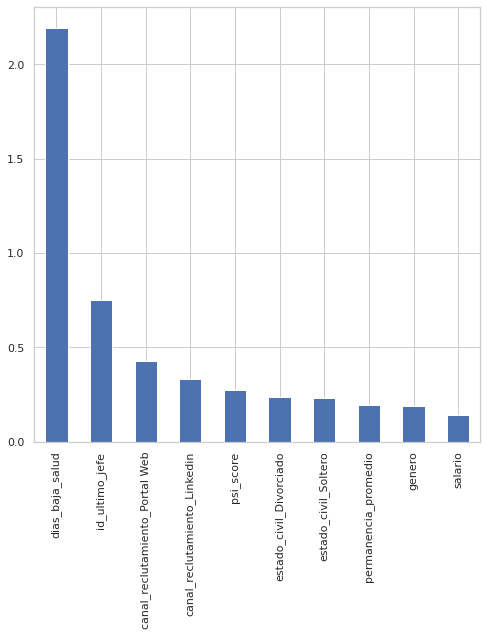

In [509]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'));

AxesSubplot(0.125,0.125;0.775x0.755)


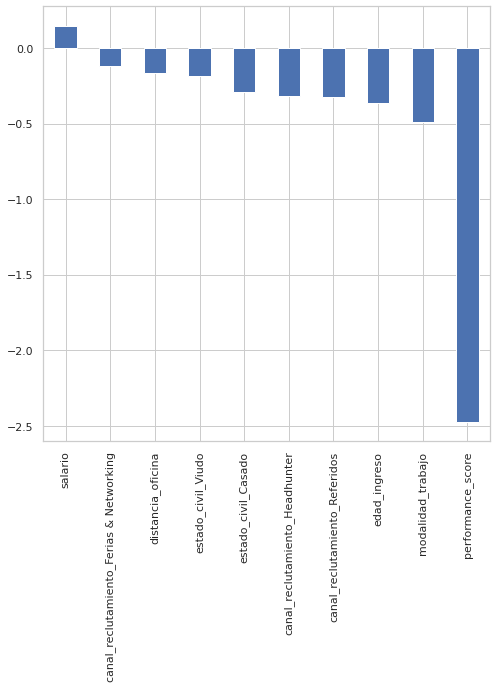

In [510]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [511]:
# llamamos el metodo para crear la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

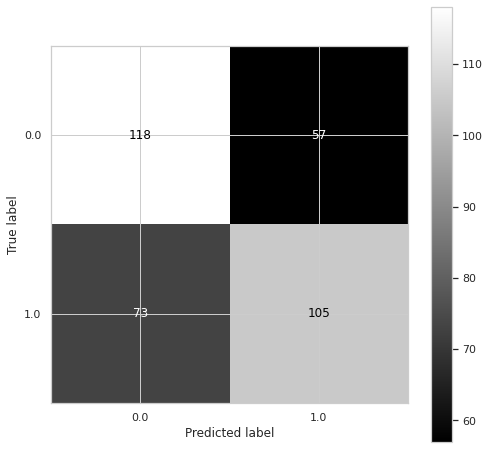

In [512]:
# Size de la grafica
fig = plt.figure(figsize=(11,11))

# creacion de la matriz
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)

# visualizacion de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [513]:
# Calcular métricas a partir de la matriz de confusión
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [514]:
# Calcular precisión, sensibilidad, especificidad, y tasa de error
precision = TP / (TP + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
tasa_error = (FP + FN) / (TP + TN + FP + FN)

# Imprimir las métricas
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Tasa de Error:", tasa_error)
print('f1-score: ',(2*precision*sensibilidad)/(precision + sensibilidad))

Precisión: 0.6481481481481481
Sensibilidad: 0.5898876404494382
Especificidad: 0.6742857142857143
Tasa de Error: 0.36827195467422097
f1-score:  0.6176470588235294


# Prediccion del modelo para test_data

In [515]:
# creamos la nueva prediccion
prediction_test = model.predict(Xt)

In [516]:
# convertimos las predicciones a un dataframe
df_pred = pd.DataFrame(prediction_test, columns=['abandono_6meses'])
df_pred.head()

,abandono_6meses
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [517]:
# trae los valores originales de id_colaborador al nuevo dataframe
df_pred['ID'] = df_testr['id_colaborador'].values

# reordenar variables
df_pred = df_pred[['ID','abandono_6meses']]


In [518]:
df_pred['abandono_6meses'] = df_pred['abandono_6meses'].astype(int)
df_pred.head()

,ID,abandono_6meses
0,100486,0
1,103752,0
2,103937,1
3,101744,1
4,101037,0


# Exportar Predicciones

In [519]:
# exportar predicciones
df_pred.to_csv('submission_3.csv', index=False)